# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = pd.merge(mouse_metadata,study_results, how = 'outer', on = 'Mouse ID' )
# Display the data table for preview
mouse_merge.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [86]:
# Checking the number of mice.
mouse_count = mouse_merge['Mouse ID'].unique()
mouse_unique_count = len(mouse_count)
mouse_unique_count

249

In [87]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = mouse_merge[mouse_merge.duplicated(['Mouse ID','Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
g989loc = duplicate.iloc[0,0]
g989loc
print(f'The duplicate mouse based on Mouse ID and Timepoint is {g989loc}')

The duplicate mouse based on Mouse ID and Timepoint is g989


In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = mouse_merge.loc[mouse_merge['Mouse ID'] == 'g989',:]
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merge2 = mouse_merge[mouse_merge['Mouse ID'] != 'g989' ]
mouse_merge2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
# Checking the number of mice in the clean DataFrame.
nondup_mouse = mouse_merge2['Mouse ID'].unique()
nondup_mouse_count = len(nondup_mouse)
nondup_mouse_count

248

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_group = mouse_merge2.groupby('Drug Regimen')
mean_tumor_volume = mean_tumor_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = mean_tumor_group['Tumor Volume (mm3)'].median()
variance_tumor_volume = mean_tumor_group['Tumor Volume (mm3)'].var()
std_tumor_volume = mean_tumor_group['Tumor Volume (mm3)'].std()
sem_tumor_volume = mean_tumor_group['Tumor Volume (mm3)'].sem()
Summary_Stats = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume, 'Median Tumor Volume':median_tumor_volume,
                             'Tumor Volume Variance': variance_tumor_volume, 'Tumor Volume Std. Dev.':std_tumor_volume,
                             'Tumor Volume Std. Err.':sem_tumor_volume})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary_Stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
 
Summary_stats_agg = mean_tumor_group.agg({'Tumor Volume (mm3)': ['mean','median','var', 'std', 'sem']})
Summary_stats_agg


# Using the aggregation method, produce the same summary statistics in a single line.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

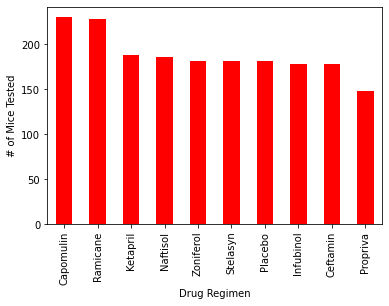

In [94]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugcount = mean_tumor_group['Timepoint'].count()
drugcount2 = drugcount.sort_values(ascending=False)
drugcount2_bar = drugcount2.plot.bar(color= 'r')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Tested")
plt.show()

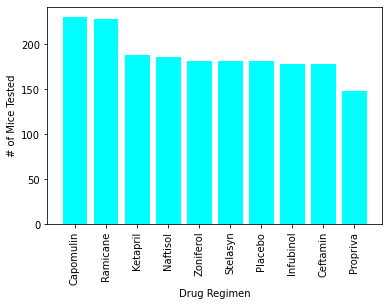

In [95]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugcount2frame = pd.DataFrame(drugcount2)
drugcount2frame
x_axis = drugcount2frame.index.unique()
plt.bar(x_axis, drugcount2 , color='cyan', alpha=1, align="center")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Tested")
plt.show()

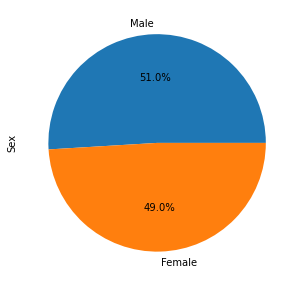

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = mouse_merge2['Sex'].value_counts()
male_female

male_female_pie = male_female.plot.pie(y = 'Mouse ID', figsize = (5,5),autopct="%1.1f%%")

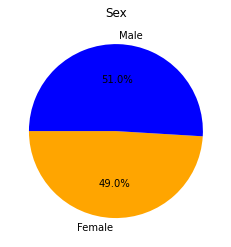

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = [922,958]
sex = ['Female', 'Male']
colors = ['Orange', 'Blue']
plt.pie(sizes, labels=sex, colors=colors,autopct="%1.1f%%", startangle = 180)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = mouse_merge2.groupby('Mouse ID')
max_timepoint = max_mouse['Timepoint'].max()
max_timepointframe = pd.DataFrame(max_timepoint)


#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepointmerge = pd.merge(mouse_merge2, max_timepointframe, on=['Mouse ID','Timepoint'], how = 'inner')
max_timepointmerge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
druglist= ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_cap = []
tumor_vol_data_ram = []
tumor_vol_data_inf = []
tumor_vol_data_cef = []

 # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in druglist:
    if drug == druglist[0]:
        capmax = max_timepointmerge['Tumor Volume (mm3)'].loc[max_timepointmerge['Drug Regimen'] == drug]
        tumor_vol_data_cap.append(capmax)
        quartile_cap = capmax.quantile([.25,.50,.75])
        lowerq_cap = quartile_cap[0.25]
        upperq_cap = quartile_cap[0.75]
        iqr_cap = upperq_cap-lowerq_cap
        lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
        upper_bound_cap = upperq_cap + (1.5*iqr_cap)
        cap_data = capmax.to_frame()
        outlier_cap = cap_data.loc[(cap_data['Tumor Volume (mm3)']>upper_bound_cap) | (cap_data['Tumor Volume (mm3)']< lower_bound_cap)]
    elif drug == druglist[1]:
        rammax = max_timepointmerge['Tumor Volume (mm3)'].loc[max_timepointmerge['Drug Regimen'] == drug]
        tumor_vol_data_ram.append(rammax)
        quartile_ram = rammax.quantile([.25,.50,.75])
        lowerq_ram = quartile_ram[0.25]
        upperq_ram = quartile_ram[0.75]
        iqr_ram = upperq_ram-lowerq_ram
        lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
        upper_bound_ram = upperq_ram + (1.5*iqr_ram)
        ram_data = rammax.to_frame()
        outlier_ram = ram_data.loc[(ram_data['Tumor Volume (mm3)']>upper_bound_ram) | (ram_data['Tumor Volume (mm3)']< lower_bound_ram)]
    elif drug == druglist[2]:
        infmax = max_timepointmerge['Tumor Volume (mm3)'].loc[max_timepointmerge['Drug Regimen'] == drug]
        tumor_vol_data_inf.append(infmax)
        quartile_inf = infmax.quantile([.25,.50,.75])
        lowerq_inf = quartile_inf[0.25]
        upperq_inf = quartile_inf[0.75]
        iqr_inf = upperq_inf-lowerq_inf
        lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
        upper_bound_inf = upperq_inf + (1.5*iqr_inf)
        inf_data = infmax.to_frame()
        outlier_inf = inf_data.loc[(inf_data['Tumor Volume (mm3)']>upper_bound_inf) | (inf_data['Tumor Volume (mm3)']< lower_bound_inf)]
    elif drug == druglist[3]:
        cefmax = max_timepointmerge['Tumor Volume (mm3)'].loc[max_timepointmerge['Drug Regimen'] == drug]
        tumor_vol_data_cef.append(cefmax)
        quartile_cef = cefmax.quantile([.25,.50,.75])
        lowerq_cef = quartile_cef[0.25]
        upperq_cef = quartile_cef[0.75]
        iqr_cef = upperq_cef-lowerq_cef
        lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
        upper_bound_cef = upperq_cef + (1.5*iqr_cef)
        cef_data = cefmax.to_frame()
        outlier_cef = cef_data.loc[(cef_data['Tumor Volume (mm3)']>upper_bound_cef) | (cef_data['Tumor Volume (mm3)']< lower_bound_cef)]

druglist2 = tumor_vol_data_cap +tumor_vol_data_ram + tumor_vol_data_inf + tumor_vol_data_cef
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # add subset 
    

    # Determine outliers using upper and lower bounds

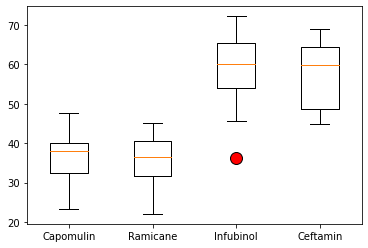

In [100]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(druglist2, labels = druglist, flierprops = red_out)
plt.show()


## Line and Scatter Plots

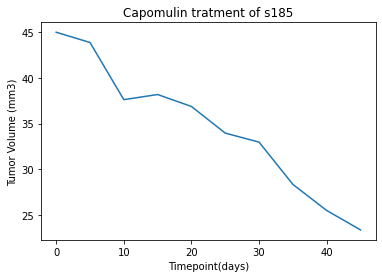

In [101]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# I chose mouse s185
s185 = mouse_merge.loc[mouse_merge['Mouse ID'] == 's185']
s185_xaxis = s185['Timepoint']
s185_yaxis = s185['Tumor Volume (mm3)']
plt.title('Capomulin tratment of s185')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(s185_xaxis,s185_yaxis)
plt.show()

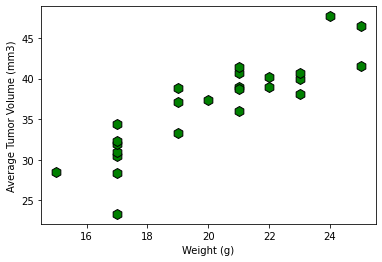

In [114]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = max_timepointmerge.loc[max_timepointmerge['Drug Regimen']== 'Capomulin']

cap_mouseweight = mouse_weight['Weight (g)']
cap_mousevol = mouse_weight['Tumor Volume (mm3)']
plt.scatter(cap_mouseweight,cap_mousevol, marker="h", facecolors="green", edgecolors="black", s = 100)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.88


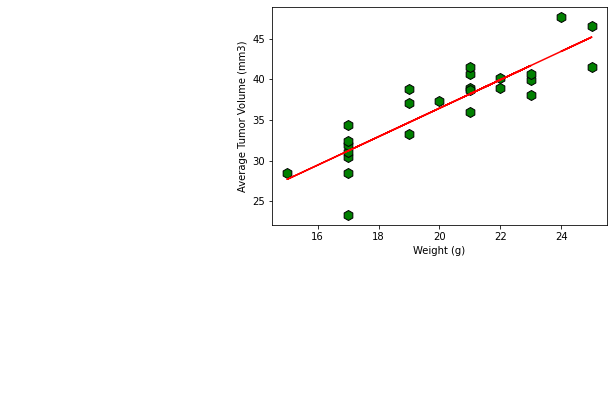

The equation of the linear regression is y = 1.75x + 1.45


In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouseweight,cap_mousevol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_mouseweight,cap_mousevol)
regress_values = cap_mouseweight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_mouseweight,cap_mousevol, marker="h", facecolors="green", edgecolors="black", s = 100)
plt.plot(cap_mouseweight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f'The equation of the linear regression is {line_eq}')